In [17]:
# Imports

import time
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.lines import Line2D
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,precision_recall_fscore_support, f1_score, recall_score, confusion_matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.58      0.67        98

    accuracy                           1.00     56962
   macro avg       0.90      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



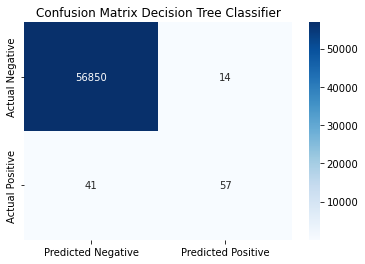

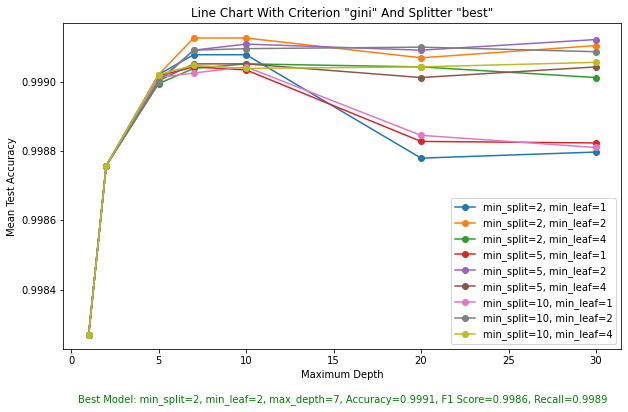

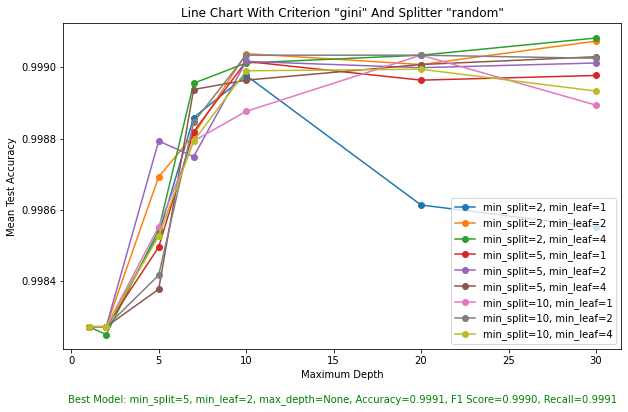

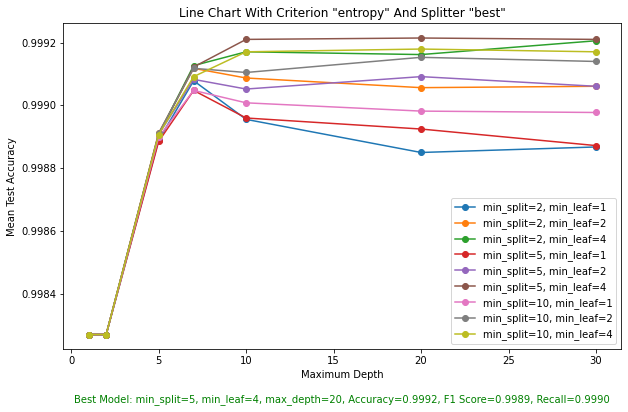

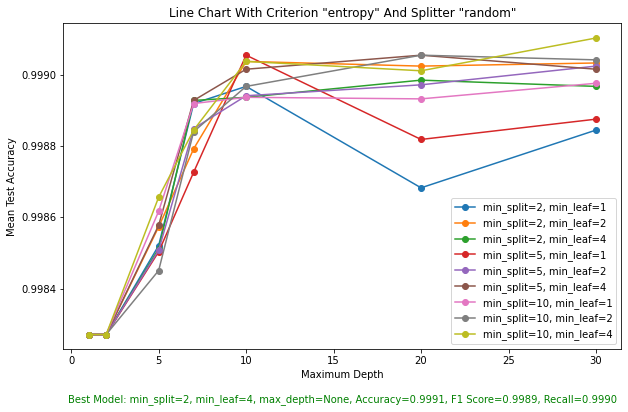

In [13]:
# The DT algorithm with hyperparamters

df = pd.read_csv("creditcard.csv")
df = df[["Time","V1","V2","V3","V4","V5","V6", "V7", "V8", "Class", "Amount"]]
df = df.dropna()

X = df.drop('Class', axis=1)
y = df['Class']

le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decis_tree_model_custom_hyper = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2, 5, 7, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator = decis_tree_model_custom_hyper, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(class_report)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix Decision Tree Classifier")
plt.show()

findings = pd.DataFrame(grid_search.cv_results_)

for criterion in param_grid['criterion']:
    for splitter in param_grid['splitter']:
        filterd_findings= findings[(findings['param_criterion'] == criterion) & (findings['param_splitter'] == splitter)]
        label = f'{criterion}_{splitter}'

        plt.figure(figsize=(10, 6))
        
        label_BestModel = None  

        for min_split in param_grid['min_samples_split']:
            for min_leaf in param_grid['min_samples_leaf']:
                current_findings = filterd_findings[
                    (filterd_findings['param_min_samples_split'] == min_split) &
                    (filterd_findings['param_min_samples_leaf'] == min_leaf)
                ]
                specific_label = f'min_split={min_split}, min_leaf={min_leaf}'
                plt.plot(
                    current_findings['param_max_depth'],
                    current_findings['mean_test_score'],
                    label=specific_label,
                    marker='o'
                )
        
                if label_BestModel is None or current_findings['mean_test_score'].max() > best_model_accuracy:
                    index_bestModel = current_findings['mean_test_score'].idxmax()
                    depth_bestModel = current_findings.loc[index_bestModel, 'param_max_depth']
                    acuracy_bestModel = current_findings.loc[index_bestModel, 'mean_test_score']
                    best_model_accuracy=acuracy_bestModel
                    #current better model with current hyperparameters
                    final_model = DecisionTreeClassifier(
                        criterion=criterion,
                        splitter=splitter,
                        min_samples_split=min_split,
                        min_samples_leaf=min_leaf,
                        max_depth=depth_bestModel  # Use the depth of the best model
                    )
                    final_model.fit(X_train, y_train)  # Train the final model

                    y_best_pred = final_model.predict(X_test)
                    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_best_pred, average='weighted')
                    label_BestModel = f'Best Model: {specific_label}, max_depth={depth_bestModel}, Accuracy={acuracy_bestModel:.4f}, F1 Score={f1_score:.4f}, Recall={recall:.4f}'

        plt.title(f'Line Chart With Criterion "{criterion}" And Splitter "{splitter}"')
        plt.xlabel('Maximum Depth')
        plt.ylabel('Mean Test Accuracy')
        plt.legend()
        plt.annotate(label_BestModel, xy=(0.5, 0), xytext=(0, -50),
                     xycoords='axes fraction', textcoords='offset points',
                     ha='center', va='center', fontsize=10, color='green')
        plt.show()

Best n_neighbors: 5
Best Weights: distance
Best Metric: manhattan


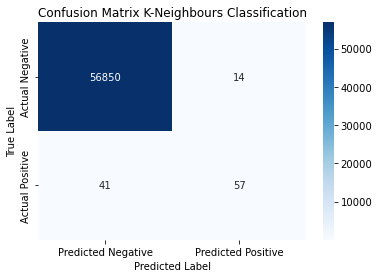

Accuracy: 0.9989993328885924

Confusion Matrix:
[[56850    14]
 [   41    57]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.52      0.64        98

    accuracy                           1.00     56962
   macro avg       0.92      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962



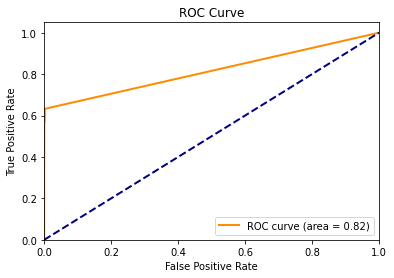

In [15]:
# Apply K-NN Algorithm with hyperparameters

df2 = pd.read_csv("creditcard.csv")
df2 = df2[["Time","V1","V2","V3","V4","V5","Class", "Amount"]]
df2 = df2.dropna()

X = df2.drop('Class', axis=1)
y = df2['Class']

le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier()

pipeline = make_pipeline(StandardScaler(), model)

parameter_grid = {
    'kneighborsclassifier__n_neighbors': range(1, 20),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(pipeline, parameter_grid, cv = 10, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

n_neighbors_bestModel = grid_search.best_params_['kneighborsclassifier__n_neighbors']
weights_bestModel = grid_search.best_params_['kneighborsclassifier__weights']
metric_bestModel = grid_search.best_params_['kneighborsclassifier__metric']

model = KNeighborsClassifier(n_neighbors=n_neighbors_bestModel, weights=weights_bestModel, metric=metric_bestModel)
model.fit(X_train, y_train)

print(f"Best n_neighbors: {n_neighbors_bestModel}")
print(f"Best Weights: {weights_bestModel}")
print(f"Best Metric: {metric_bestModel}")

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix K-Neighbours Classification")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

conf_matrix = confusion_matrix(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

C:\Users\manpr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
190 fits failed out of a total of 380.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\manpr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manpr\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\manpr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalt

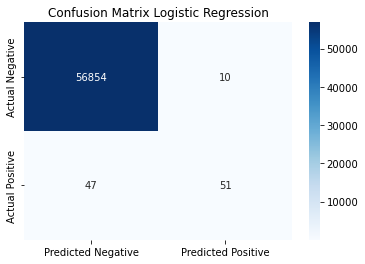

Optimal C: 14
Optimal Penalty: l2
Optimal Accuracy: 0.9981742214107651

Confusion Matrix:
[[56854    10]
 [   47    51]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.52      0.64        98

    accuracy                           1.00     56962
   macro avg       0.92      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962



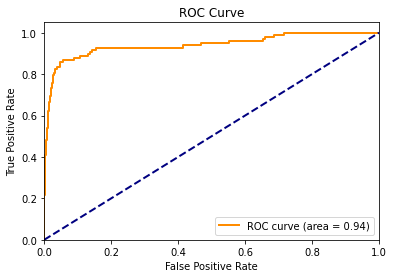

In [18]:
# The model with hyperparamters

df3 = pd.read_csv("creditcard.csv")
df3 = df3[["Time","V1","V2","V3","V4","V5","Class", "Amount"]]
df3 = df3.dropna()

X = df3.drop('Class', axis=1)
y = df3['Class']

le = preprocessing.LabelEncoder()
X = X.apply(le.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

pipeline = make_pipeline(StandardScaler(), model)

parameter_grid = {
    'logisticregression__C': range(1, 20),
    'logisticregression__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(pipeline, parameter_grid, cv = 10, scoring = 'accuracy')

grid_search.fit(X_train, y_train)

optimal_C = grid_search.best_params_['logisticregression__C']
optimal_penalty = grid_search.best_params_['logisticregression__penalty']

model = LogisticRegression(C = optimal_C, penalty = optimal_penalty)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix Logistic Regression")
plt.show()

print(f"Optimal C: {optimal_C}")
print(f"Optimal Penalty: {optimal_penalty}")
print(f"Optimal Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()